### Importação dos dados



In [10]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [23]:
def calcular_faturamento_total(loja):
  return loja['Preço'].sum()

faturamento_loja1 = calcular_faturamento_total(loja)
faturamento_loja2 = calcular_faturamento_total(loja2)
faturamento_loja3 = calcular_faturamento_total(loja3)
faturamento_loja4 = calcular_faturamento_total(loja4)

faturamento_por_loja = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Faturamento Total': [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
})
print(faturamento_por_loja)

     Loja  Faturamento Total
0  Loja 1         1534509.12
1  Loja 2         1488459.06
2  Loja 3         1464025.03
3  Loja 4         1384497.58


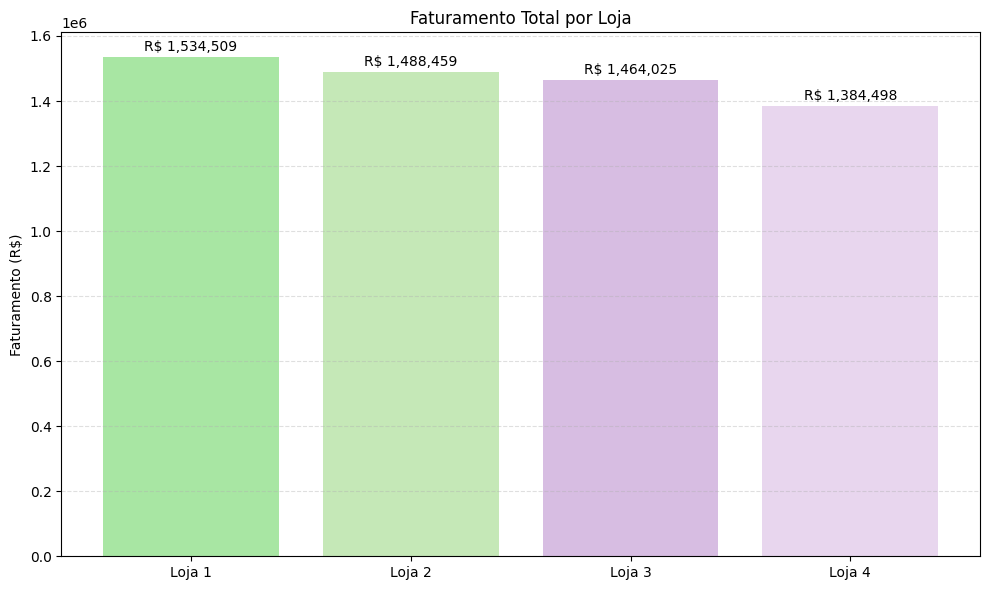

In [53]:
import matplotlib.pyplot as plt
import numpy as np

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamento = [1534509.12, 1488459.06, 1464025.03, 1384497.58]

plt.figure(figsize=(10,6))

# Tons diferentes de verde claro e roxo claro
cores = ['#A8E6A3',  # verde claro
         '#C5E8B7',  # verde ainda mais suave
         '#D7BDE2',  # roxo claro
         '#E8D6EE']  # roxo bem clarinho

barras = plt.bar(lojas, faturamento, color=cores)

plt.title('Faturamento Total por Loja')
plt.ylabel('Faturamento (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Adicionando valores acima das barras
for barra in barras:
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width()/2,
        altura + 20000,
        f'R$ {altura:,.0f}',
        ha='center',
        fontsize=10
    )

plt.tight_layout()
plt.show()

# 2. Vendas por Categoria

In [25]:
def calcular_vendas_por_categoria(loja):
  vendas_por_categoria = loja.groupby('Categoria do Produto')['Preço'].sum()
  return vendas_por_categoria

vendas_por_categoria_loja1 = calcular_vendas_por_categoria(loja)
vendas_por_categoria_loja2 = calcular_vendas_por_categoria(loja2)
vendas_por_categoria_loja3 = calcular_vendas_por_categoria(loja3)
vendas_por_categoria_loja4 = calcular_vendas_por_categoria(loja4)

print("Vendas por categoria na Loja 1:\n", vendas_por_categoria_loja1)
print("\nVendas por categoria na Loja 2:\n", vendas_por_categoria_loja2)
print("\nVendas por categoria na Loja 3:\n", vendas_por_categoria_loja3)
print("\nVendas por categoria na Loja 4:\n", vendas_por_categoria_loja4)


Vendas por categoria na Loja 1:
 Categoria do Produto
brinquedos                23993.78
eletrodomesticos         484913.36
eletronicos              572659.23
esporte e lazer           52387.55
instrumentos musicais    121731.69
livros                    11713.92
moveis                   250178.11
utilidades domesticas     16931.48
Name: Preço, dtype: float64

Vendas por categoria na Loja 2:
 Categoria do Produto
brinquedos                21262.21
eletrodomesticos         464758.13
eletronicos              547773.71
esporte e lazer           46326.09
instrumentos musicais    139987.03
livros                    13454.35
moveis                   235234.68
utilidades domesticas     19662.86
Name: Preço, dtype: float64

Vendas por categoria na Loja 3:
 Categoria do Produto
brinquedos                25869.20
eletrodomesticos         438984.89
eletronicos              547699.92
esporte e lazer           47456.10
instrumentos musicais    103174.45
livros                    12664.70
moveis    

# 3. Média de Avaliação das Lojas

1.   Item da lista
2.   Item da lista




In [26]:
def calcular_media_avaliacao(loja):
  media_avaliacao = loja['Avaliação da compra'].mean()
  return media_avaliacao

media_avaliacao_loja1 = calcular_media_avaliacao(loja)
media_avaliacao_loja2 = calcular_media_avaliacao(loja2)
media_avaliacao_loja3 = calcular_media_avaliacao(loja3)
media_avaliacao_loja4 = calcular_media_avaliacao(loja4)

print("Média de avaliação na Loja 1:", media_avaliacao_loja1)
print("Média de avaliação na Loja 2:", media_avaliacao_loja2)
print("Média de avaliação na Loja 3:", media_avaliacao_loja3)
print("Média de avaliação na Loja 4:", media_avaliacao_loja4)

Média de avaliação na Loja 1: 3.976685036032217
Média de avaliação na Loja 2: 4.037303942348453
Média de avaliação na Loja 3: 4.048325561678677
Média de avaliação na Loja 4: 3.9957591178965224


# 4. Produtos Mais e Menos Vendidos

> `Adicionar aspas`



In [36]:
def identificar_produtos_mais_e_menos_vendidos(loja):

  quantidade_vendida_por_produto = loja['Produto'].value_counts()

  produto_mais_vendido = quantidade_vendida_por_produto.idxmax()

  produto_menos_vendido = quantidade_vendida_por_produto.idxmin()

  produtos_mais_e_menos_vendidos = {
      'produto_mais_vendido': produto_mais_vendido,
      'produto_menos_vendido': produto_menos_vendido
  }

  return produtos_mais_e_menos_vendidos

produtos_mais_e_menos_vendidos_loja1 = identificar_produtos_mais_e_menos_vendidos(loja)
produtos_mais_e_menos_vendidos_loja2 = identificar_produtos_mais_e_menos_vendidos(loja2)
produtos_mais_e_menos_vendidos_loja3 = identificar_produtos_mais_e_menos_vendidos(loja3)
produtos_mais_e_menos_vendidos_loja4 = identificar_produtos_mais_e_menos_vendidos(loja4)

print("Produtos mais e menos vendidos na Loja 1:", produtos_mais_e_menos_vendidos_loja1)
print("Produtos mais e menos vendidos na Loja 2:", produtos_mais_e_menos_vendidos_loja2)
print("Produtos mais e menos vendidos na Loja 3:", produtos_mais_e_menos_vendidos_loja3)
print("Produtos mais e menos vendidos na Loja 4:", produtos_mais_e_menos_vendidos_loja4)

Produtos mais e menos vendidos na Loja 1: {'produto_mais_vendido': 'Micro-ondas', 'produto_menos_vendido': 'Headset'}
Produtos mais e menos vendidos na Loja 2: {'produto_mais_vendido': 'Iniciando em programação', 'produto_menos_vendido': 'Jogo de tabuleiro'}
Produtos mais e menos vendidos na Loja 3: {'produto_mais_vendido': 'Kit banquetas', 'produto_menos_vendido': 'Blocos de montar'}
Produtos mais e menos vendidos na Loja 4: {'produto_mais_vendido': 'Cama box', 'produto_menos_vendido': 'Guitarra'}


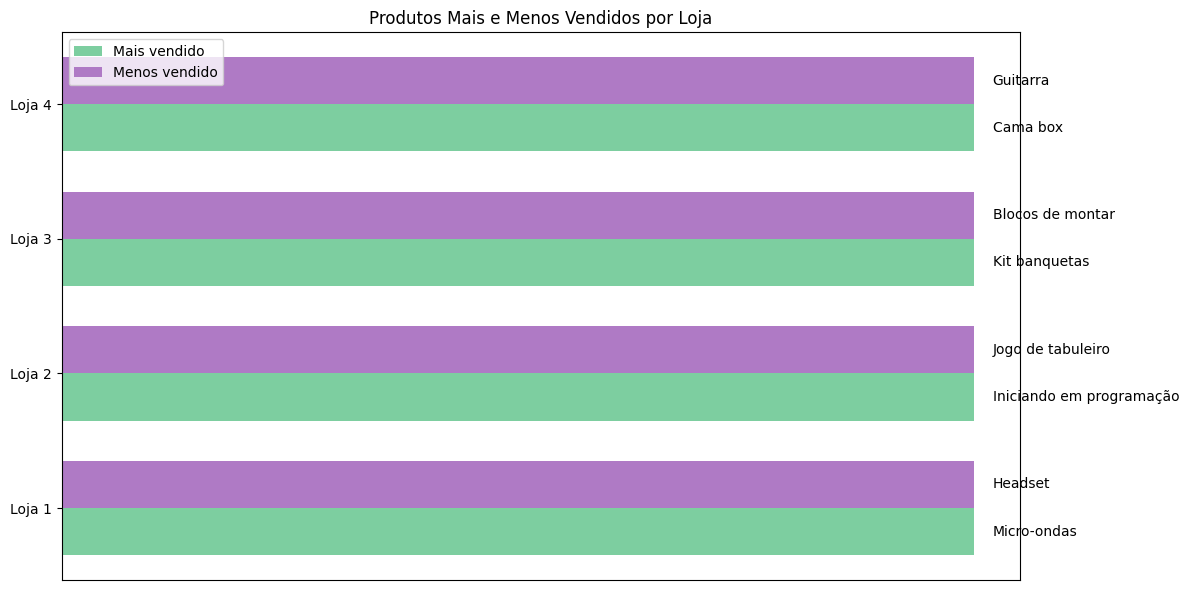

In [40]:
import matplotlib.pyplot as plt
import numpy as np

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
produtos_mais = ['Micro-ondas', 'Iniciando em programação', 'Kit banquetas', 'Cama box']
produtos_menos = ['Headset', 'Jogo de tabuleiro', 'Blocos de montar', 'Guitarra']

y = np.arange(len(lojas))
largura = 0.35

plt.figure(figsize=(12,6))

# Cores elegantes (sem vermelho e azul)
cor_mais = '#7DCEA0'     # verde oliva claro
cor_menos = '#AF7AC5'    # roxo pastel

plt.barh(y - largura/2, [1]*len(lojas), height=largura, color=cor_mais, label='Mais vendido')
plt.barh(y + largura/2, [1]*len(lojas), height=largura, color=cor_menos, label='Menos vendido')

plt.yticks(y, lojas)
plt.xticks([])

# Adicionando os nomes dos produtos
for i, produto in enumerate(produtos_mais):
    plt.text(1.02, i - largura/2, produto, va='center', fontsize=10)

for i, produto in enumerate(produtos_menos):
    plt.text(1.02, i + largura/2, produto, va='center', fontsize=10)

plt.title('Produtos Mais e Menos Vendidos por Loja')
plt.legend()
plt.tight_layout()
plt.show()

## 5. Frete Médio por Loja

In [31]:
def calcular_frete_medio(loja):

  frete_medio = loja['Frete'].mean()
  return frete_medio

frete_medio_loja1 = calcular_frete_medio(loja)
frete_medio_loja2 = calcular_frete_medio(loja2)
frete_medio_loja3 = calcular_frete_medio(loja3)
frete_medio_loja4 = calcular_frete_medio(loja4)

print("Frete médio na Loja 1:", frete_medio_loja1)
print("Frete médio na Loja 2:", frete_medio_loja2)
print("Frete médio na Loja 3:", frete_medio_loja3)
print("Frete médio na Loja 4:", frete_medio_loja4)

Frete médio na Loja 1: 34.69180491551149
Frete médio na Loja 2: 33.62194065817927
Frete médio na Loja 3: 33.07446427411743
Frete médio na Loja 4: 31.278997081841727


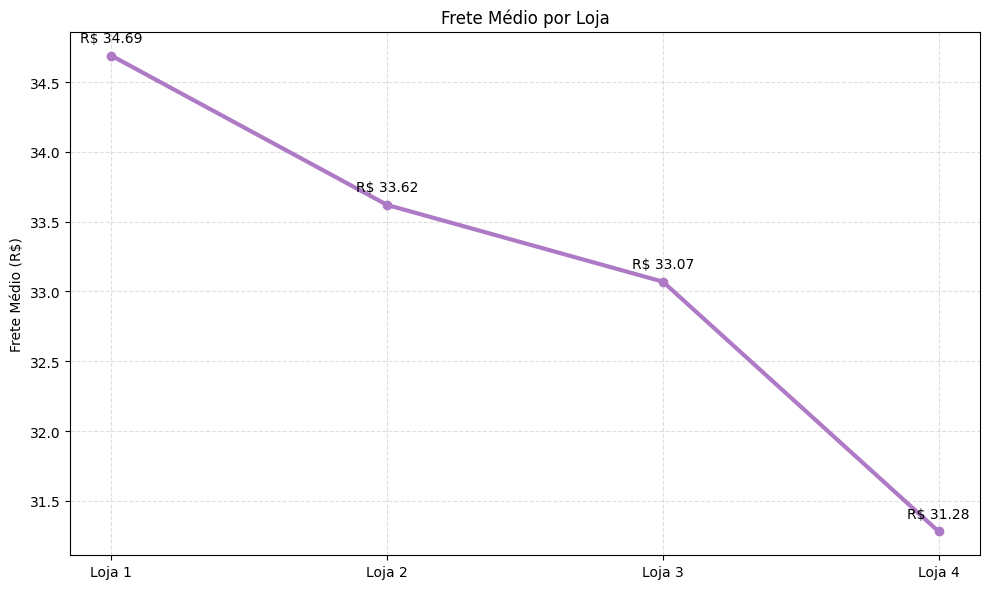

In [44]:
import matplotlib.pyplot as plt

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
fretes = [34.69, 33.62, 33.07, 31.28]

plt.figure(figsize=(10,6))

plt.plot(lojas, fretes, marker='o', linewidth=3, color='#AF7AC5')

# Adicionando os valores
for i, valor in enumerate(fretes):
    plt.text(i, valor + 0.1, f'R$ {valor:.2f}', ha='center')

plt.title('Frete Médio por Loja')
plt.ylabel('Frete Médio (R$)')
plt.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

## Relatório


Depois de analisar o faturamento, as categorias mais vendidas, as avaliações dos clientes, os produtos com maior e menor saída e o frete médio de cada loja, ficou claro que as quatro unidades tem perfis bem diferentes. A Loja 1 se destaca pelo maior faturamento e por vender produtos de alta demanda, mesmo tendo o frete mais alto. As Lojas 2 e 3 também apresentam bom equilíbrio: faturamento estável, avaliações positivas e um mix de produtos que combina bem com o público.
A Loja 4, por outro lado, aparece consistentemente atrás das demais. Ela tem o menor faturamento, a pior média de avaliação dos clientes e um mix de produtos menos eficiente, com itens de baixa saída. Mesmo oferecendo o frete mais barato, isso não compensa o desempenho mais fraco nos outros.
Por isso, a recomendação é que o Sr. João venda a Loja 4. As outras três lojas mostram mais força, estabilidade e potencial de crescimento, enquanto a Loja 4 é a que mais limita os resultados do negócio.
